# Maestría en Inteligencia Artificial Aplicada

# TC 4033: Visión computacional para imágenes y video

# Tecnológico de Monterrey

## Dr. Gilberto Ochoa Ruiz

# **# 5. Frequency Domain**

## **Equipo # 16**
### Edwin David Hernández Alejandre A01794692
### Miguel Guillermo Galindo Orozco A01793695
### Jorge Pedroza Rivera A01319553
### Juan Carlos Alvarado Carricarte A01793486
### Gerardo Aaron Castañeda Jaramillo A01137646



## Table of Contents
1. [Libraries](#libraries)
2. [Funciones](#Funciones)
2. [Ejercicios](#Ejercicios)
   1. [Ejercicio A](#EjercicioA)
   1. [Ejercicio B](#EjercicioB)
3. [Referencias](#Referencias)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy import fftpack

## Funciones <a class="anchor" id="Funciones" ></a>

In [2]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def apply_fourier_transform(image):
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    return f_transform_shifted

def apply_inverse_fourier_transform(f_transform_filtered):
    f_transform_filtered_shifted = np.fft.ifftshift(f_transform_filtered)
    image_restored = np.fft.ifft2(f_transform_filtered_shifted)
    return np.abs(image_restored)

def apply_filter(f_transform, low_pass=True, cutoff_frequency=0.2):
    rows, cols = f_transform.shape
    crow, ccol = rows // 2, cols // 2

    # Create a mask for either low-pass or high-pass filter
    mask = np.zeros((rows, cols), np.uint8)
    if low_pass:
        mask[crow-int(crow*cutoff_frequency):crow+int(crow*cutoff_frequency),
             ccol-int(ccol*cutoff_frequency):ccol+int(ccol*cutoff_frequency)] = 1
    else:
        mask[:crow-int(crow*cutoff_frequency), :] = 1
        mask[crow+int(crow*cutoff_frequency):, :] = 1

    # Apply the mask to the Fourier transformed image
    f_transform_filtered = f_transform * mask
    return f_transform_filtered

def plot_images_in_row(N, images, titles):
    # Create a figure with a single row and N columns
    plt.figure(figsize=(5 * N, 5))

    for i in range(N):
        plt.subplot(1, N, i + 1)
        plt.imshow(images[i], cmap='gray')  # assuming grayscale images
        plt.title(titles[i])
        #plt.axis('off')

    plt.tight_layout()
    plt.show()

## Ejercicios <a class="anchor" id="Ejercicios" ></a>

### Ejercicio A <a class="anchor" id="EjercicioA" ></a>

 Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

Una posible aplicación para un filtro paso bajo es el proceso de redimensionamiento de imágenes. Al reducir imágenes de tamaño, puede que su frecuencia de muestreo no sea suficiente para capturar detalles finos. Lo que resulta en perdida de calidad. Por lo que se filtra primero con paso bajo, para eliminar las altas frecuencias de la imagen, suavizando así los bordes y reduciendo el ruido. Después, se aplica el redimensionamiento de la imagen. Lo que resulta en una imagen redimensionada que conversa los detalles importantes y tiene una apariencia suave.

Mientras que esta aplicación se utiliza comúnmente para la visualización de imágenes en dispositivos de menor tamaño a lo usual, tales como celulares o pantallas de tiempo atrás. Así como la generación de miniaturas de imágenes.


Comenzamos aplicando el filtro de paso bajo. El cual es usualmente utilizado para limpiar de ruido las imágenes.

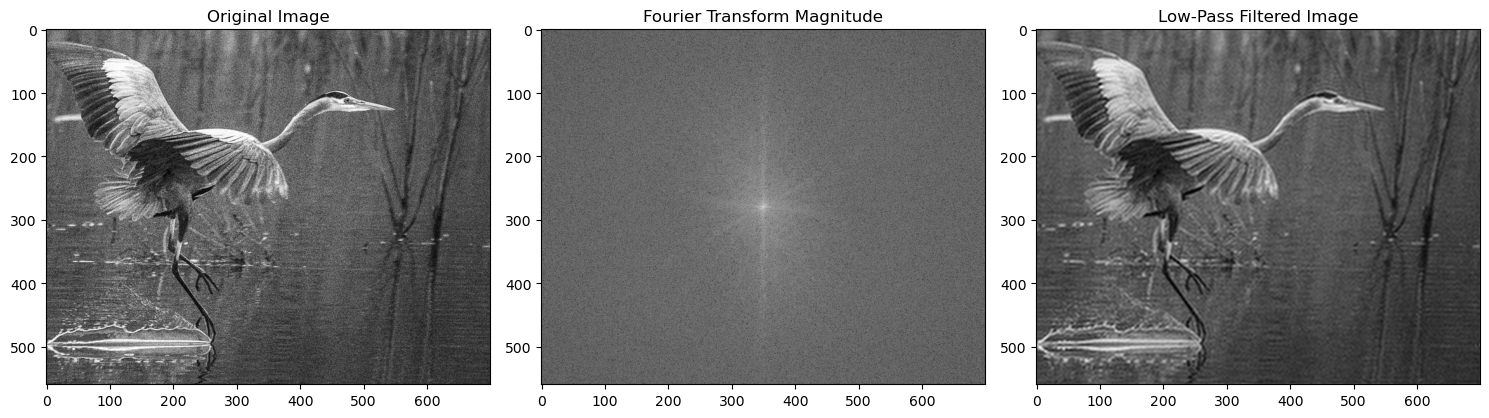

In [3]:
images_plot = []
titles = []

# Load the image
image = cv2.imread('data/image_noise.jpg', cv2.IMREAD_GRAYSCALE)
images_plot.append(image); titles.append('Original Image')

f_transform = apply_fourier_transform(image)

f_transform_filtered = apply_filter(f_transform, low_pass=True, cutoff_frequency=0.3)
images_plot.append(np.log(1 + np.abs(f_transform))); titles.append('Fourier Transform Magnitude')

# Perform Inverse Fourier Transform
restored_image = apply_inverse_fourier_transform(f_transform_filtered)
images_plot.append(restored_image); titles.append('Low-Pass Filtered Image')

plot_images_in_row(len(images_plot), images_plot, titles)

Ahora aplicamos su redimensionamiento:

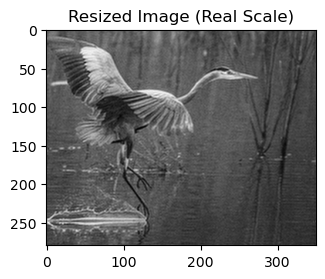

In [4]:
# Calculate the desired dimensions (resizing to 1/10 of the original size)
width = int(restored_image.shape[1] / 2)
height = int(restored_image.shape[0] / 2)

# Resize the image using OpenCV's resize function
resized_image = cv2.resize(restored_image, (width, height))

resized_height, resized_width = resized_image.shape

# Set the figure size to match the dimensions of the resized image
plt.figure(figsize=(resized_width / 100, resized_height / 100))
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Image (Real Scale)')
#plt.axis('off')  # Hide axis
plt.show()

Ahora aplicamos los filtros Ideal, Butterworth, y Gaussiano en su versión de paso bajo:

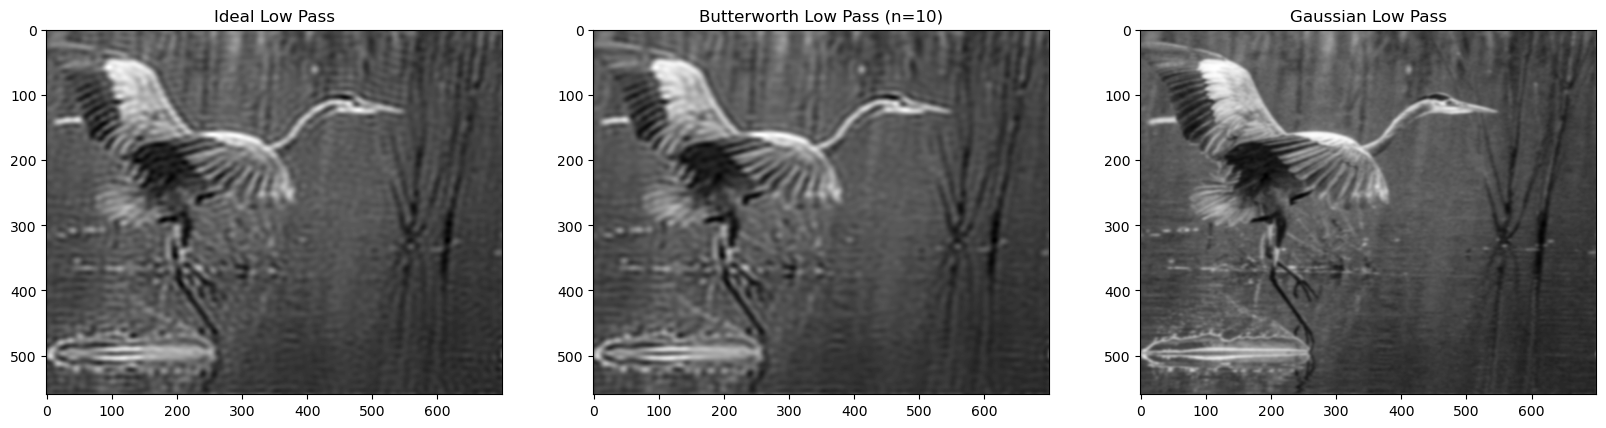

In [5]:
img = cv2.imread('data/image_noise.jpg', cv2.IMREAD_GRAYSCALE)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(20, 25), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
ideal_resized = np.abs(inverse_LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
butterworth_resized = np.abs(inverse_LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
gaussian_resized = np.abs(inverse_LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

Y seguido aplicamos su redimensionamiento:

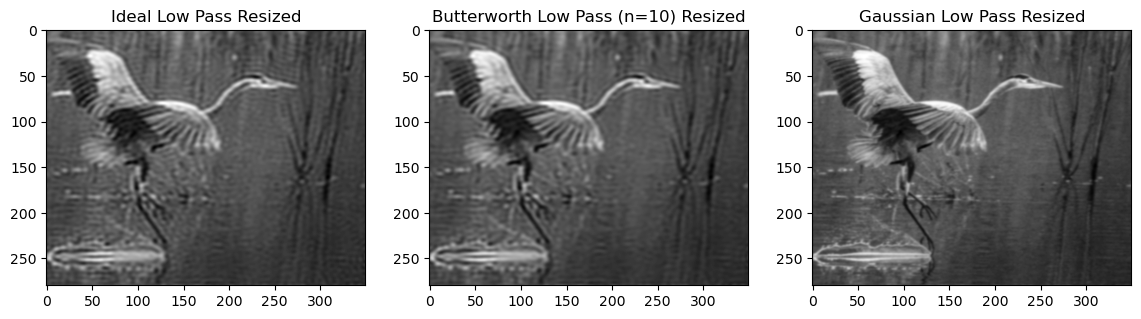

In [6]:
ideal_resized = cv2.resize(ideal_resized, (width, height))
butterworth_resized = cv2.resize(butterworth_resized, (width, height))
gaussian_resized = cv2.resize(gaussian_resized, (width, height))

plt.figure(figsize=(resized_width / 25, resized_height / 25))

plt.subplot(131), plt.imshow(ideal_resized, "gray"), plt.title("Ideal Low Pass Resized")

plt.subplot(132), plt.imshow(butterworth_resized, "gray"), plt.title("Butterworth Low Pass (n=10) Resized")

plt.subplot(133), plt.imshow(gaussian_resized, "gray"), plt.title("Gaussian Low Pass Resized")

plt.show()

En todas sus aplicaciones de redimensionamiento, sea con los filtros que sea, es posible observar que el resultado es una imagen que conservo dentro de lo cabe, su calidad al cambiar sus dimensiones.

### Ejercicio B <a class="anchor" id="EjercicioB" ></a>

Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

El filtro de paso alto en imágenes se utiliza en general para resaltar los detalles de alta frecuencia de una imagen. Por lo que puede utilizarse para detección de bordes, o para extracción de texturas. Los bordes, al ser regiones donde hay cambios significativos de la intensidad de los pixeles, el filtro paso alto resalta estos cambios. Lo que facilita su detección. Mientras que la detección de texturas, suele utilizarse en la inspección de materiales o en su clasificación.

Comenzamos aplicando un filtro paso alto:

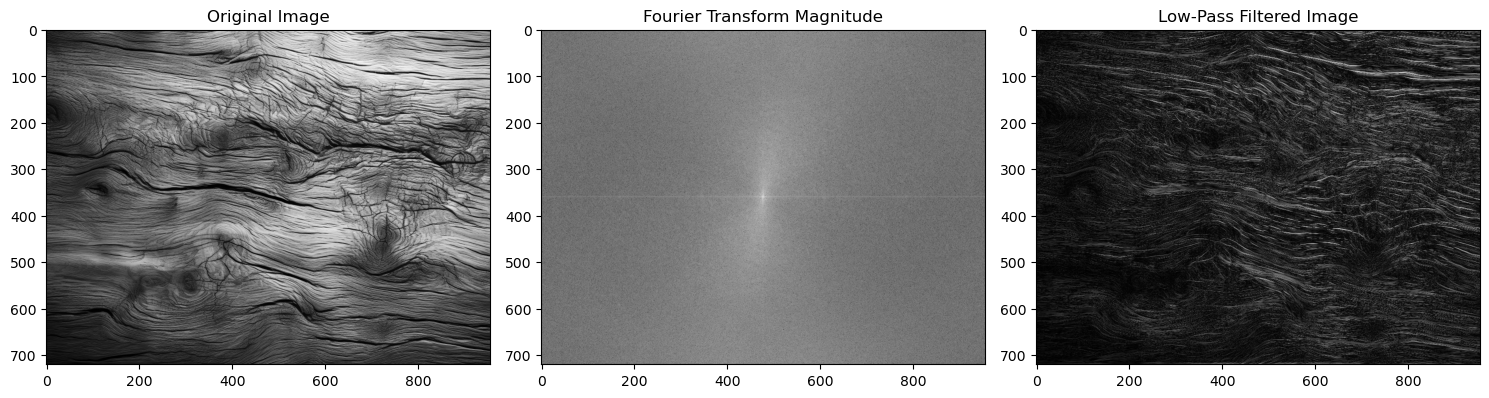

In [7]:
images_plot = []
titles = []

# Load the image
image = cv2.imread('data/texture.jpg', cv2.IMREAD_GRAYSCALE)
images_plot.append(image); titles.append('Original Image')

f_transform = apply_fourier_transform(image)

f_transform_filtered = apply_filter(f_transform, low_pass=False, cutoff_frequency=0.1)
images_plot.append(np.log(1 + np.abs(f_transform))); titles.append('Fourier Transform Magnitude')

# Perform Inverse Fourier Transform
restored_image = apply_inverse_fourier_transform(f_transform_filtered)
images_plot.append(restored_image); titles.append('Low-Pass Filtered Image')

plot_images_in_row(len(images_plot), images_plot, titles)

Ahora un filtro Ideal, Butterworth, y Gaussiano:

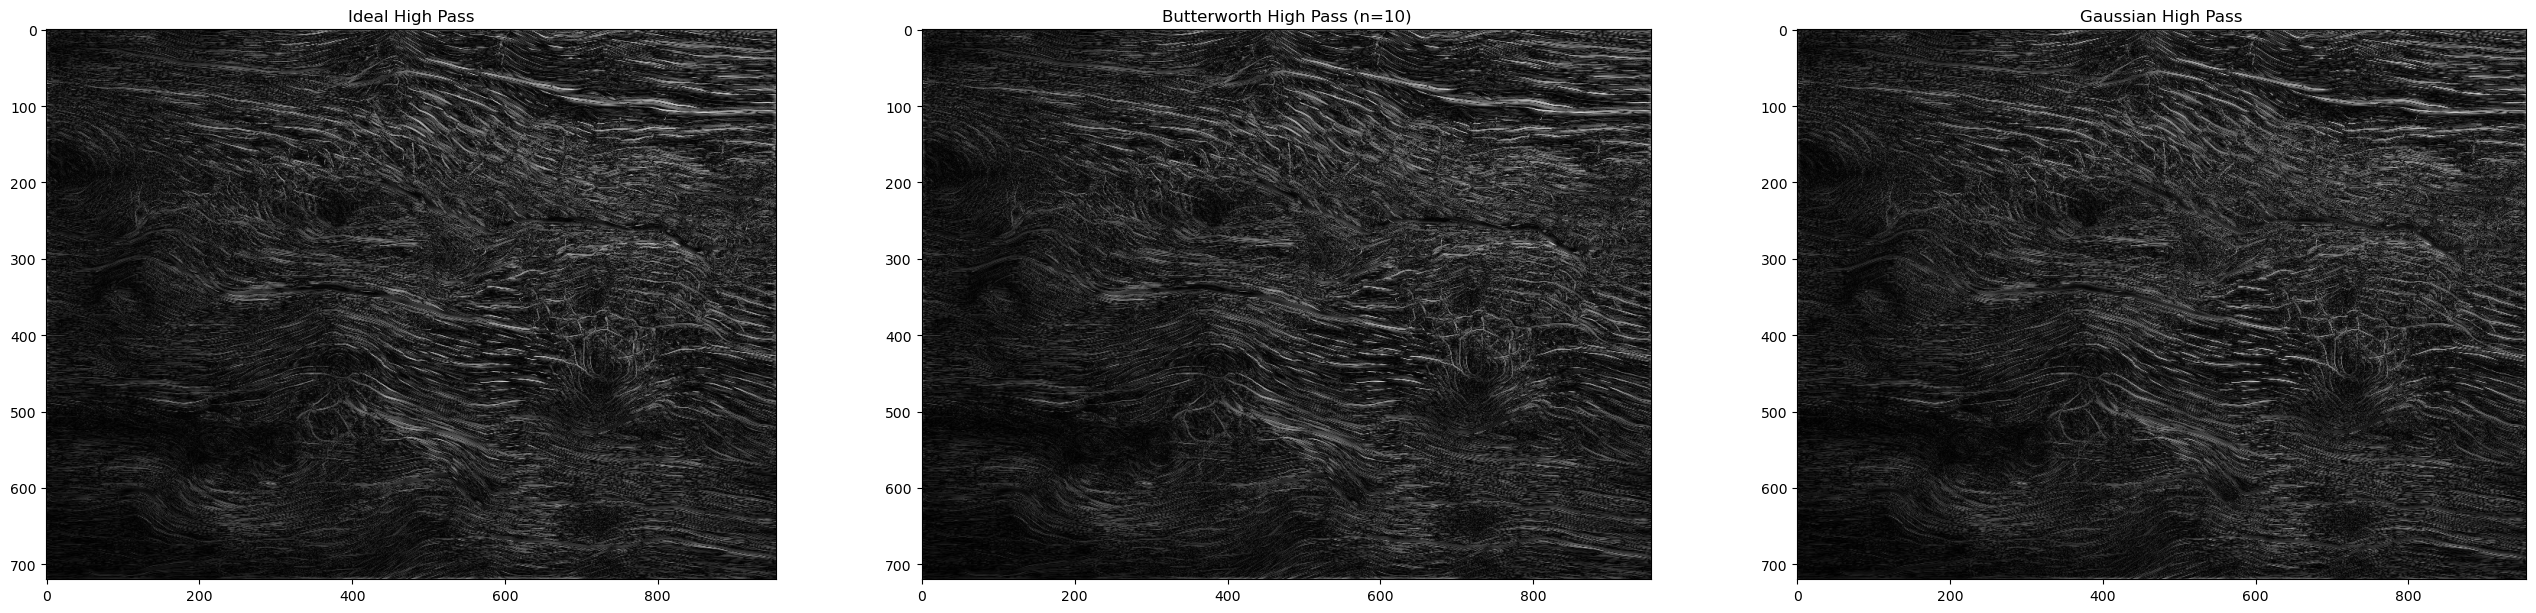

In [8]:
img = cv2.imread('data/texture.jpg', cv2.IMREAD_GRAYSCALE)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

Es posible ver a simple vista en todas sus variaciones, como el piso de paso alto ayuda a la detección de bordes y texturas.  

# **6. Referencias** <a class="anchor" id="Referencias" ></a>

* Bradski, G. (2000). The OpenCV Library. Dr. Dobb's Journal of Software Tools.
*Dayal, D. (2021). Frequency Domain Filtering on an Image using OpenCV. Retrieved from Medium: https://medium.com/@devangdayal/frequency-domain-filtering-on-an-image-using-opencv-26bfcc97e23b
* Gonzalez, R., & Woods, R. (2018). Digital Image Processing. Pearson.
* OpenCV. (n.d.). Fourier Transform. Retrieved from OpenCV: https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html
* Reyes, I. (2023). 5. Frequency Domain. Retrieved from Github: https://github.com/CV-INSIDE/computer-vision-course/blob/main/5_frequency_domain.ipynb
* Rosebrock, A. (2020). OpenCV Fast Fourier Transform (FFT) for blur detection in images and video streams. Retrieved from pyimagesearch: https://pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/






